<a href="https://colab.research.google.com/github/mosaabseta/ML/blob/main/coursera_tensor_flow_certificate_trainning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [4]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [9]:
model.compile(optimizer="sgd",loss="mean_squared_error")

In [7]:
xs =np.array([-1.0,0.0,1.0,2.0,3.0,4.0],dtype=float)
min = 0
max = 1
ys =np.array([-3.0,-1.0,1.0,3.0,5.0,7.0],dtype=float)
m_ys= np.interp(ys,(ys.min(),ys.max()))

In [10]:
model.fit(xs,ys,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 417ms/step - loss: 60.6029
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 48.1128
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 38.2773
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 30.5305
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 24.4271
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 19.6169
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 15.8243
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 12.8324
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 10.4707
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 8.6049
Epoch 11/500
1/1 [==============================] - 0s 10ms/step - loss: 7.1295
Epoch 12/500
1/1 [==============================] - 0s 8ms/step - loss: 5.9613
Epoch 13/500
1/1 [=======================

In [12]:
model.predict([10.0])

1/1 [==============================] - 0s 138ms/step


array([[18.975332]], dtype=float32)

In [14]:

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_lables) , (testing_images,testing_lables) = fmnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [2]:
import matplotlib.pyplot as plt 

In [32]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [33]:

training_images = training_images/250.0
testing_images =testing_images/250.0

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [35]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=(["accuracy"])
)

In [36]:
model.fit(training_images,training_lables,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 101s 53ms/step - loss: 2.3028 - accuracy: 0.0991
Epoch 2/5
1875/1875 [==============================] - 95s 51ms/step - loss: 2.3028 - accuracy: 0.0989
Epoch 3/5
1875/1875 [==============================] - 95s 51ms/step - loss: 2.3028 - accuracy: 0.0989
Epoch 4/5
1875/1875 [==============================] - 97s 52ms/step - loss: 2.3028 - accuracy: 0.0994
Epoch 5/5
1875/1875 [==============================] - 96s 51ms/step - loss: 2.3028 - accuracy: 0.0971


In [37]:
model.evaluate(testing_images,testing_lables)

313/313 [==============================] - 5s 15ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302635431289673, 0.10000000149011612]

In [42]:
print(testing_lables[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [3]:
from tensorflow.keras import models

1/1 [==============================] - 0s 25ms/step


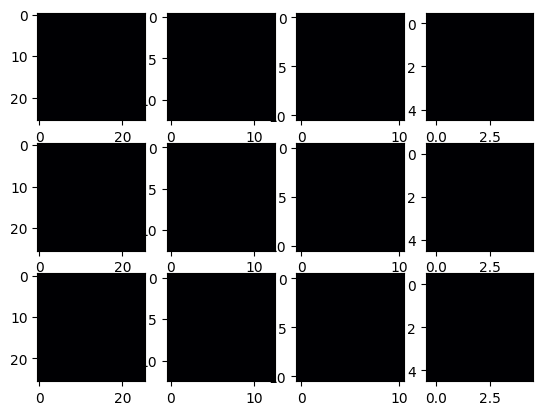

In [52]:
f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(testing_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(testing_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(testing_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [4]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

# # Download the validation set
# !wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-05-01 09:49:16--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 209.85.145.128, 172.217.219.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   211MB/s    in 0.7s    

2023-05-01 09:49:17 (211 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [5]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# # Unzip validation set
# local_zip = './validation-horse-or-human.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('./validation-horse-or-human')


zip_ref.close()

In [6]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')


# # Directory with validation horse pictures
# validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# # Directory with validation human pictures
# validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [7]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])


# validation_horse_names = os.listdir(validation_horse_dir)
# print(f'VAL SET HORSES: {validation_horse_names[:10]}')

# validation_human_names = os.listdir(validation_human_dir)
# print(f'VAL SET HUMANS: {validation_human_names[:10]}')

['horse48-4.png', 'horse24-3.png', 'horse31-5.png', 'horse49-2.png', 'horse05-1.png', 'horse50-8.png', 'horse17-1.png', 'horse39-0.png', 'horse19-6.png', 'horse33-3.png']
['human13-19.png', 'human06-03.png', 'human11-29.png', 'human09-17.png', 'human09-25.png', 'human12-16.png', 'human06-09.png', 'human03-00.png', 'human01-06.png', 'human04-12.png']


In [8]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))


total training horse images: 500
total training human images: 527


In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

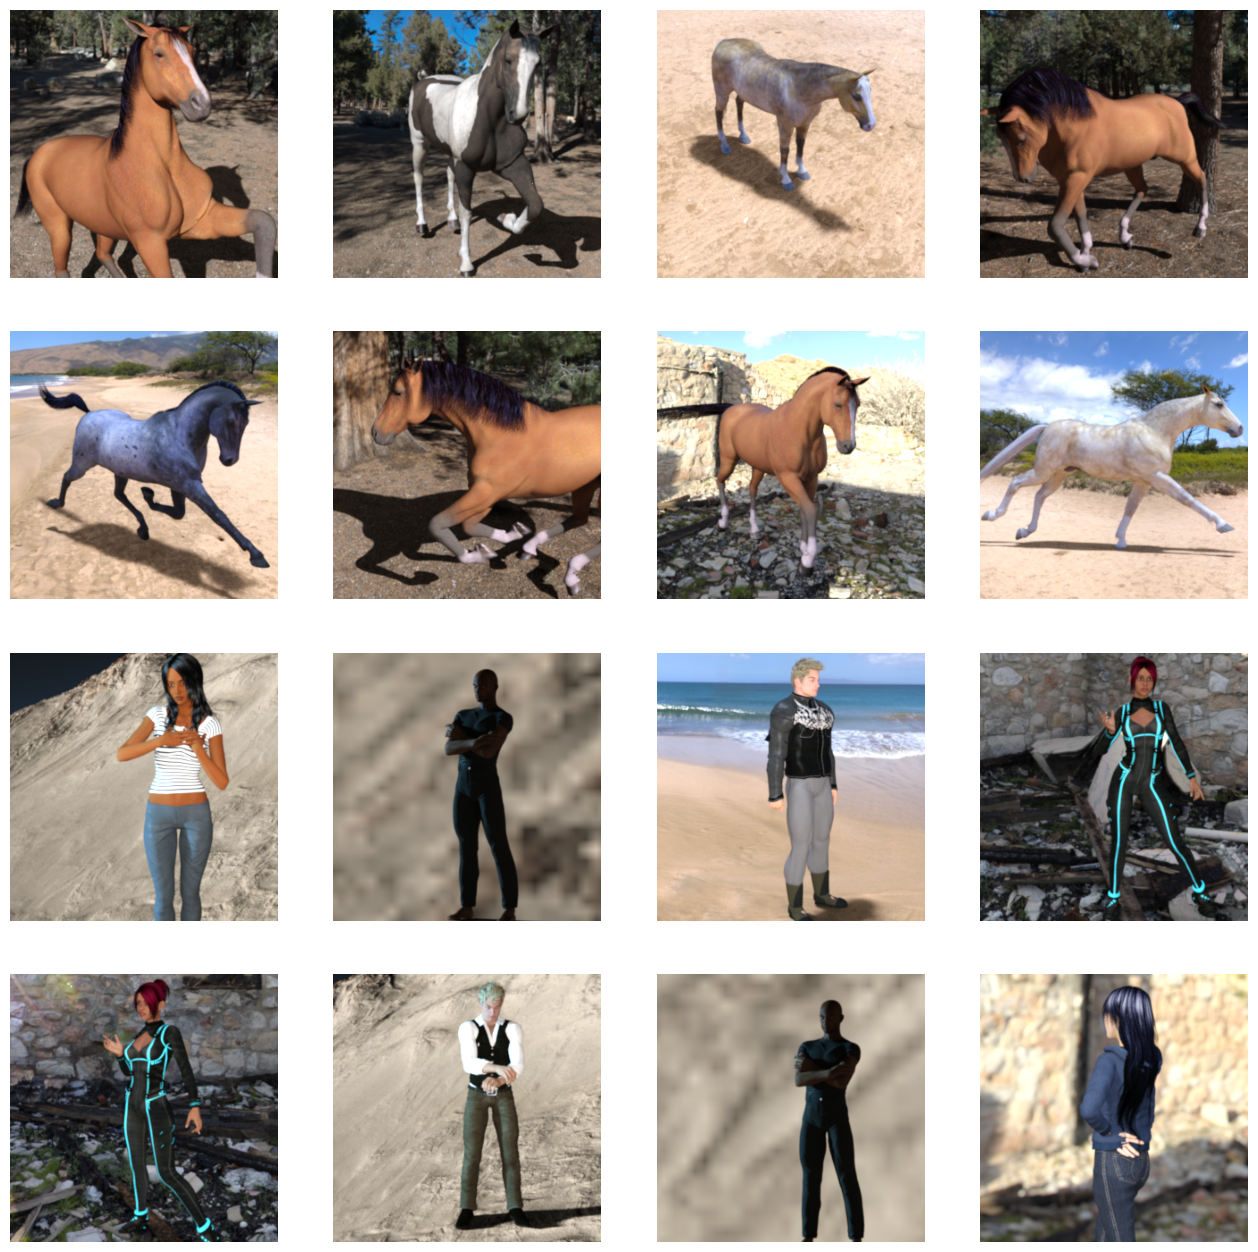

In [10]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [11]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

#   train_datagen = ImageDataGenerator(
#     rescale=1/255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# validation_datagen = ImageDataGenerator(rescale=1/255)


# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# # Flow validation images in batches of 128 using validation_datagen generator
# validation_generator = validation_datagen.flow_from_directory(
#         './validation-horse-or-human/',  # This is the source directory for validation images
#         target_size=(300, 300),  # All images will be resized to 300x300
#         batch_size=32,
#         # Since you use binary_crossentropy loss, you need binary labels
#         class_mode='binary')

Found 1027 images belonging to 2 classes.


In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

# history = model.fit(
#       train_generator,
#       steps_per_epoch=8,  
#       epochs=15,
#       verbose=1,
#       validation_data = validation_generator,
#       validation_steps=8)

Epoch 1/15
8/8 [==============================] - 21s 678ms/step - loss: 0.8257 - accuracy: 0.5273
Epoch 2/15
8/8 [==============================] - 8s 930ms/step - loss: 0.6993 - accuracy: 0.5873
Epoch 3/15
8/8 [==============================] - 6s 773ms/step - loss: 0.6332 - accuracy: 0.6463
Epoch 4/15
8/8 [==============================] - 6s 744ms/step - loss: 0.6880 - accuracy: 0.6296
Epoch 5/15
8/8 [==============================] - 7s 790ms/step - loss: 0.8525 - accuracy: 0.7353
Epoch 6/15
8/8 [==============================] - 7s 807ms/step - loss: 0.3267 - accuracy: 0.8710
Epoch 7/15
8/8 [==============================] - 6s 860ms/step - loss: 0.3817 - accuracy: 0.8521
Epoch 8/15
8/8 [==============================] - 7s 804ms/step - loss: 0.2748 - accuracy: 0.9132
Epoch 9/15
8/8 [==============================] - 7s 821ms/step - loss: 0.2545 - accuracy: 0.8977
Epoch 10/15
8/8 [==============================] - 8s 860ms/step - loss: 0.1718 - accuracy: 0.9321
Epoch 11/15
8/8 [=

In [15]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

1/1 [==============================] - 0s 298ms/step


<ipython-input-16-41d0a601730a>:46: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


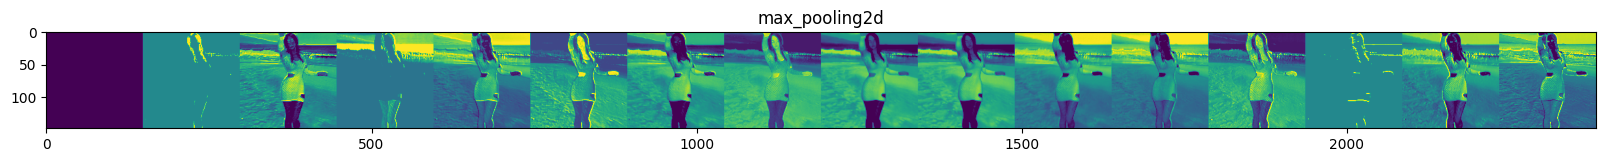

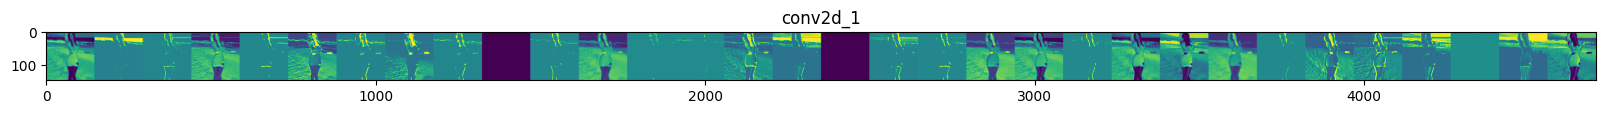

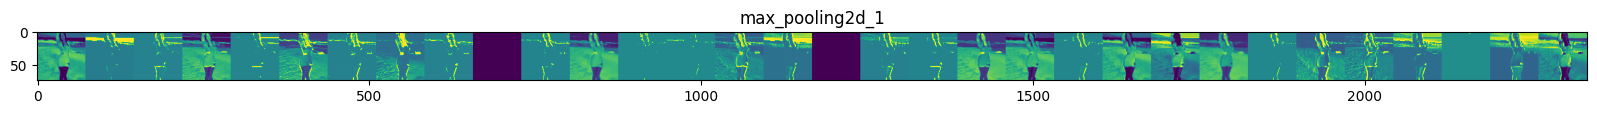

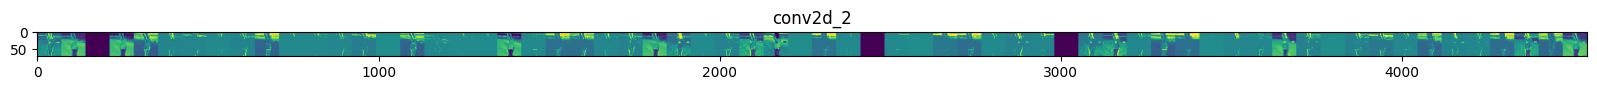

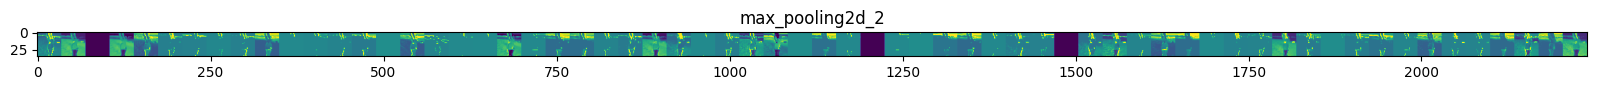

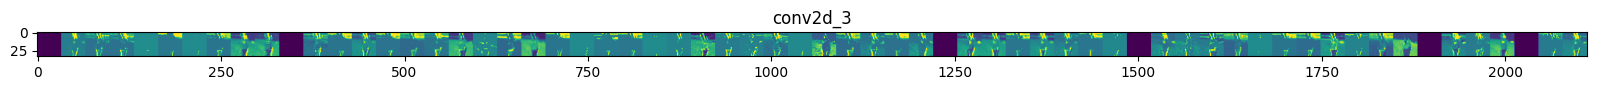

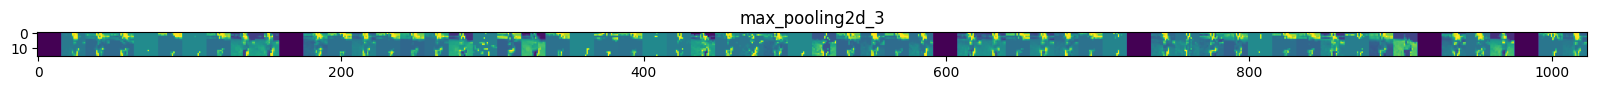

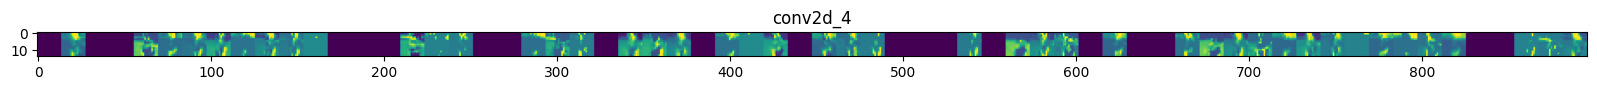

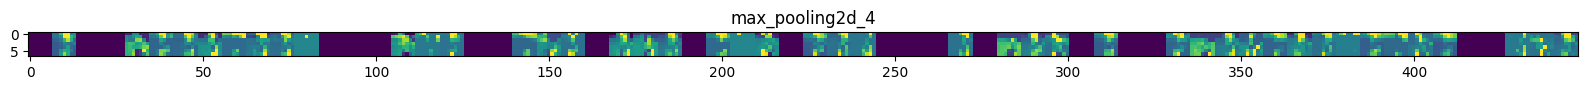

In [16]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]


# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

split data

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """

  ### START CODE HERE
  images_list = os.listdir(SOURCE_DIR)
  for x in images_list:
    if os.path.getsize(os.path.join(SOURCE_DIR, x)) == 0:
      images_list.remove(x)
      print(f"{os.path.join(SOURCE_DIR, x)} is ignored cuz it's empty")
    
  images_list = [x for x in images_list if os.path.getsize(os.path.join(SOURCE_DIR, x)) > 0]
  random.shuffle(images_list)
  validation_size = int(len(images_list) * SPLIT_SIZE)
  train_images = images_list[validation_size:]
  val_images = images_list[:validation_size]
  for image in train_images:
    shutil.copy(os.path.join(SOURCE_DIR, image), os.path.join(TRAINING_DIR, image))

  for image in val_images:
      shutil.copy(os.path.join(SOURCE_DIR, image), os.path.join(VALIDATION_DIR, image))
  pass

  ### END CODE HERE

create directory

In [ ]:
root_dir = '/tmp/cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets
  
  Args:
    root_path (string) - the base directory path to create subdirectories from
  
  Returns:
    None
  """
  ### START CODE HERE
  dirs = [f"{root_path}/training/cats",f"{root_path}/training/dogs",f"{root_path}/validation/cats",f"{root_path}/validation/dogs"]
  for dir in dirs:
    os.makedirs(os.path.join(root_path,dir))
  

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

  pass
  

  ### END CODE HERE

  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)